Saving 9. Customer Segmentation in E-commerce.csv to 9. Customer Segmentation in E-commerce.csv


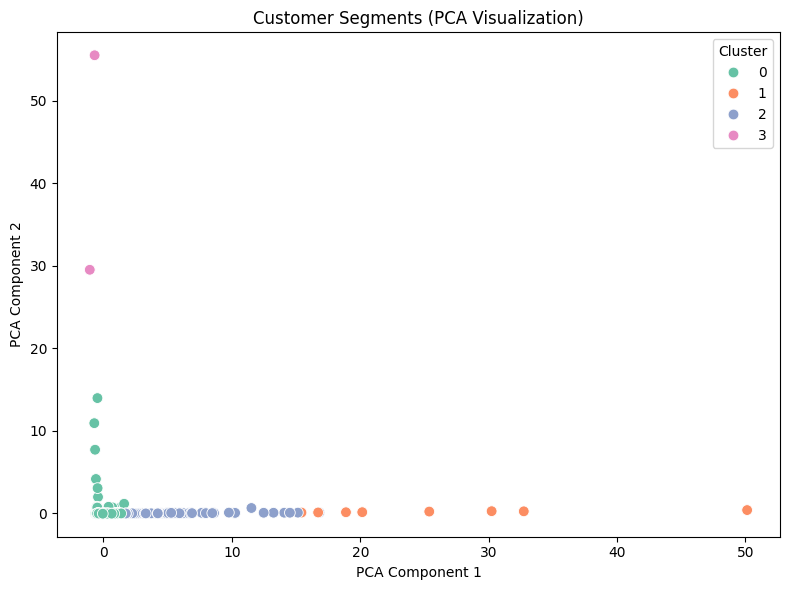

         NumPurchases  TotalQuantity  AvgUnitPrice     TotalSpent
Cluster                                                          
0            4.030360     722.512827      5.187292    1196.116504
1           80.000000   83266.500000      5.182650  155483.796250
2           39.106195   10360.530973      4.042448   17500.305752
3            3.000000      29.500000   6171.705000   -1819.065000


In [1]:
# STEP 1: Upload the dataset
from google.colab import files
uploaded = files.upload()

# STEP 2: Import required libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 3: Load and clean the data
# Replace with your actual file name after upload
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
df = df.dropna(subset=["CustomerID"])

# Add total price per item
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# STEP 4: Create customer-level features
customer_df = df.groupby("CustomerID").agg({
    "InvoiceNo": "nunique",
    "Quantity": "sum",
    "UnitPrice": "mean",
    "TotalPrice": "sum"
}).reset_index()

customer_df.columns = ["CustomerID", "NumPurchases", "TotalQuantity", "AvgUnitPrice", "TotalSpent"]

# STEP 5: Scale features
features = customer_df[["NumPurchases", "TotalQuantity", "AvgUnitPrice", "TotalSpent"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# STEP 6: Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_df["Cluster"] = kmeans.fit_predict(scaled_features)

# STEP 7: Reduce dimensions with PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
customer_df["PCA1"] = pca_components[:, 0]
customer_df["PCA2"] = pca_components[:, 1]

# STEP 8: Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=customer_df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=60)
plt.title("Customer Segments (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# STEP 9: Print cluster behavior summary
cluster_summary = customer_df.groupby("Cluster")[["NumPurchases", "TotalQuantity", "AvgUnitPrice", "TotalSpent"]].mean()
print(cluster_summary)
